<a href="https://colab.research.google.com/github/epignatelli/fenton_karma_jax/blob/master/fenton_karma_jax_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/epignatelli/fenton_karma_jax.git

Cloning into 'fenton_karma_jax'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 183 (delta 92), reused 32 (delta 12), pack-reused 0
Receiving objects: 100% (183/183), 383.07 KiB | 14.19 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [2]:
from fk import params
from fk import model
import matplotlib.pyplot as plt
import jax
import jax.numpy as np

In [8]:
# geometry
shape = (1024, 1024)
dt = 0.01
dx = 0.01

# diffusivity map
d = 0.05
D = np.ones(shape) * d

# stimuli
field = np.zeros(shape)
field = jax.ops.index_update(field, jax.ops.index[0:20], .8)
s1 = {
    "field": field,
    "start": 0,
    "duration": 2,
    "period": 0  # non-cyclic
}

field2 = np.zeros(shape)
field2 = jax.ops.index_update(field, jax.ops.index[:, -20:], .5)
s2 = {
    "field": field2,
    "start": 200,
    "duration": 2,
    "period": 0  # non-cyclic
}

field3 = np.zeros(shape)
field3 = jax.ops.index_update(field, jax.ops.index[40:60], .5)
s3 = {
    "field": field3,
    "start": 360,
    "duration": 15,
    "period": 0  # non-cyclic
}

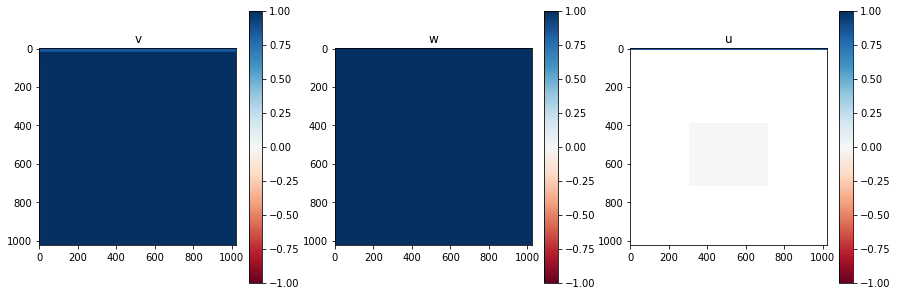

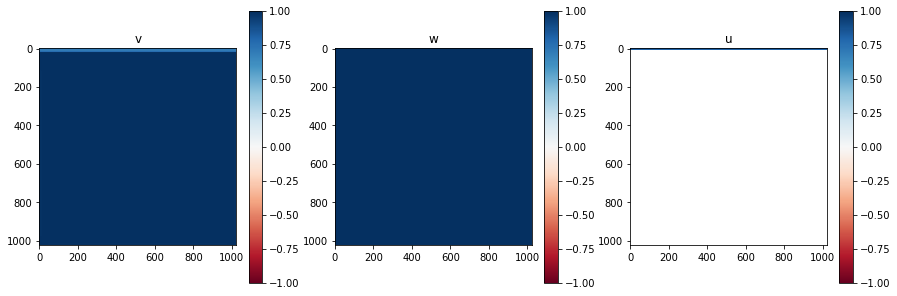

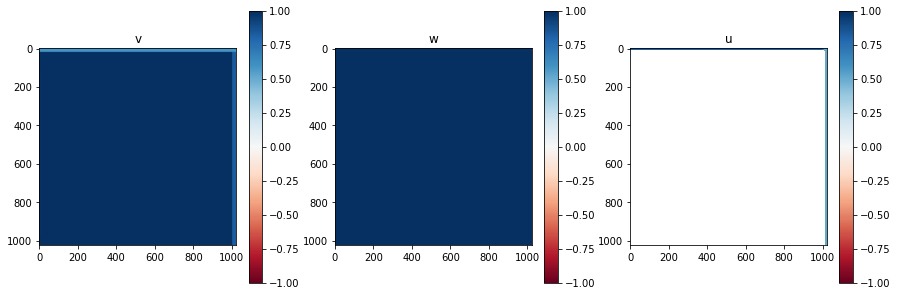

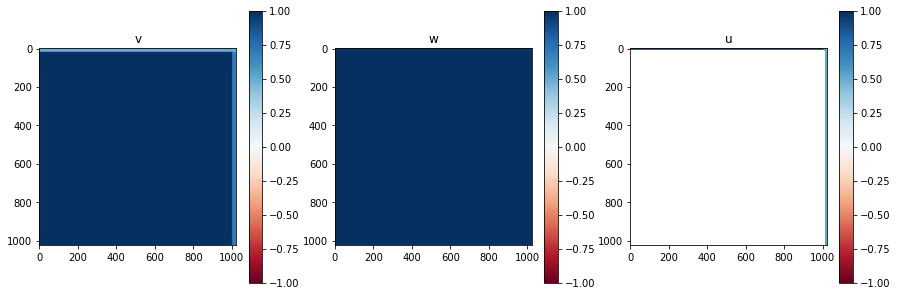

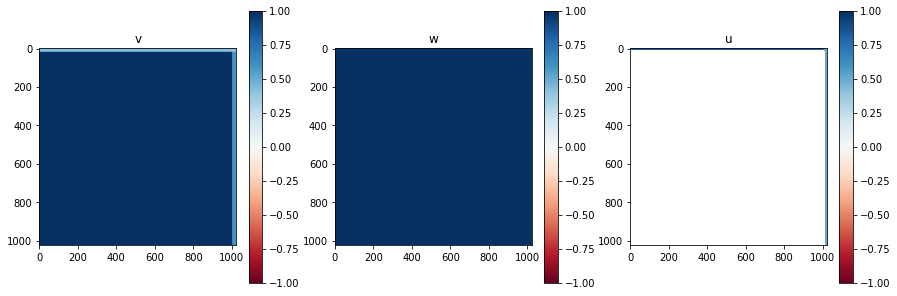

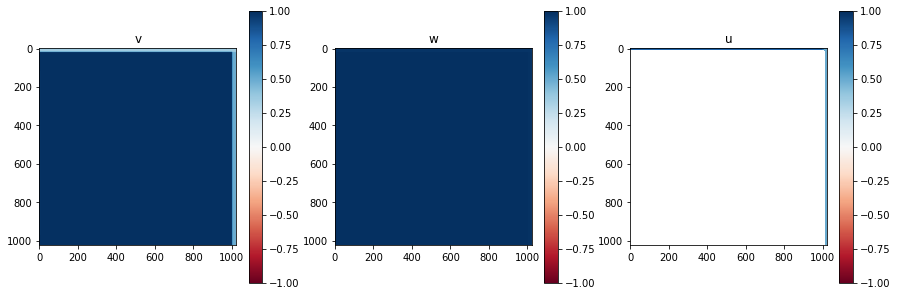

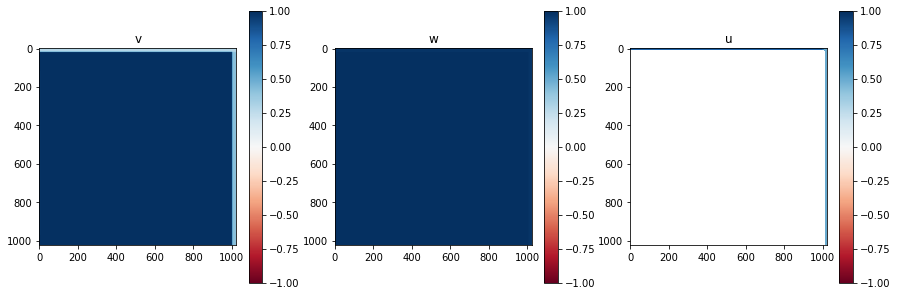

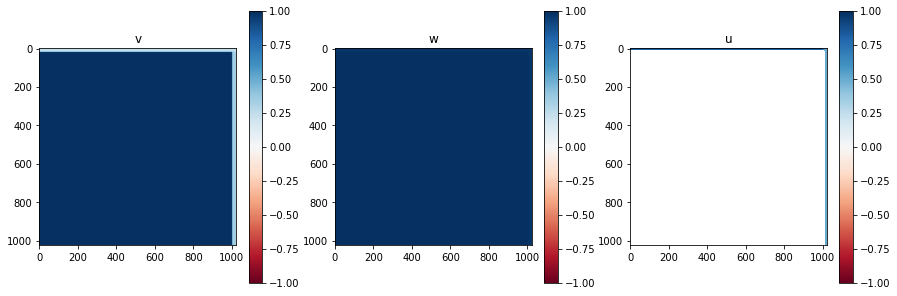

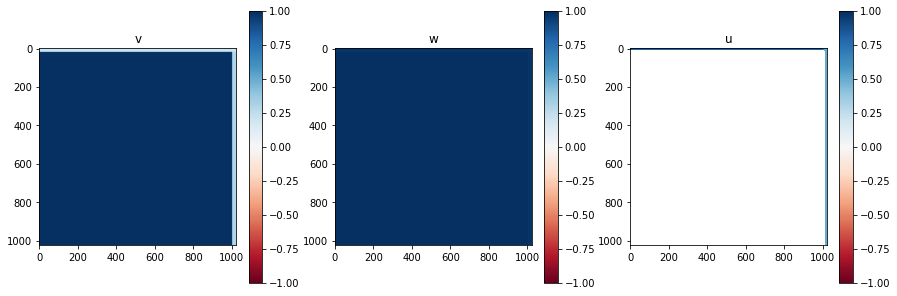

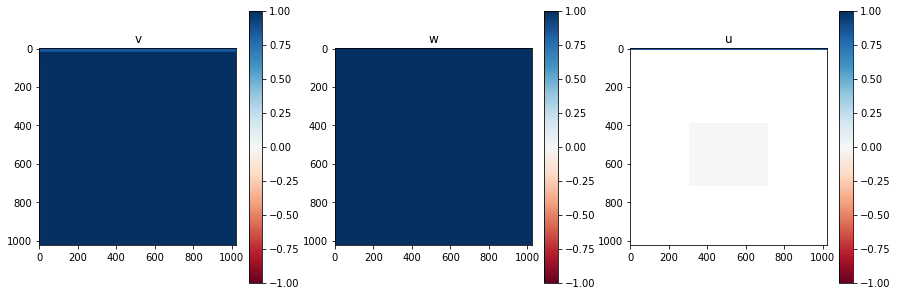

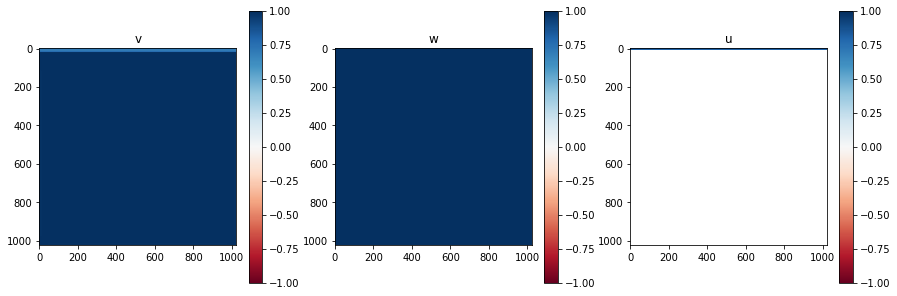

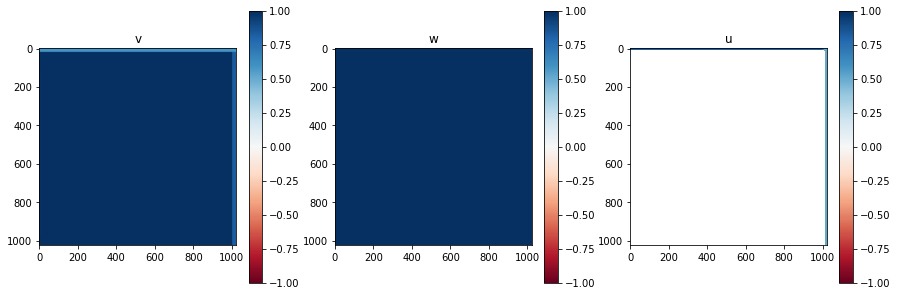

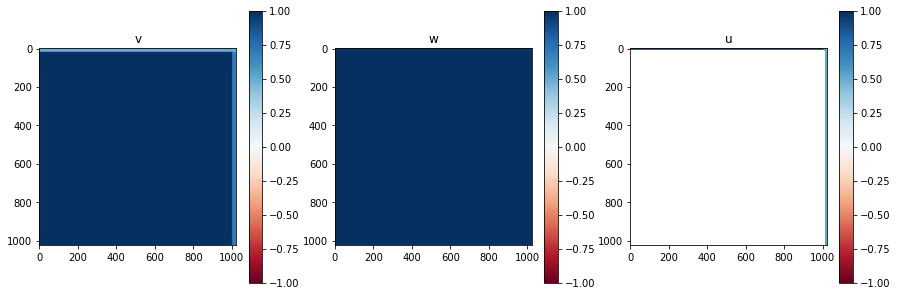

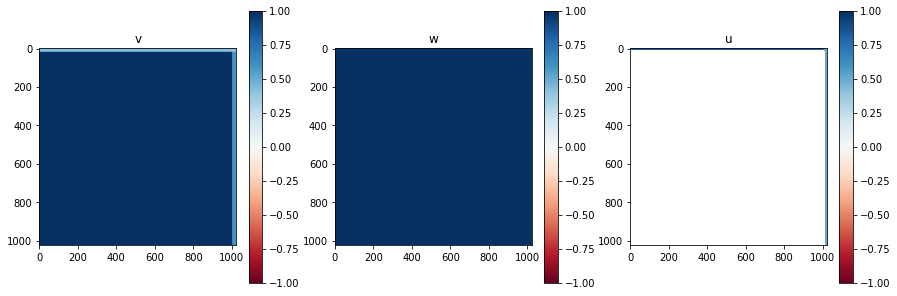

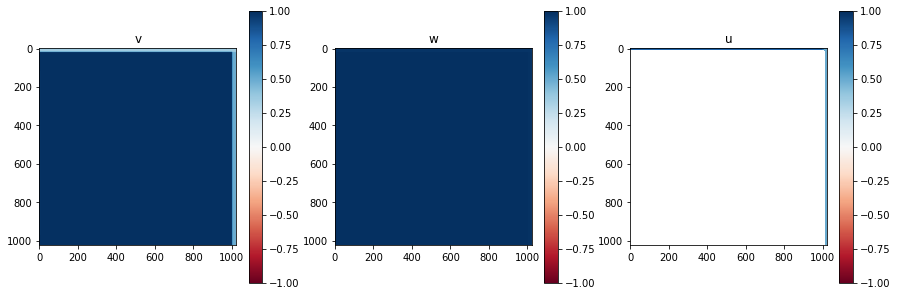

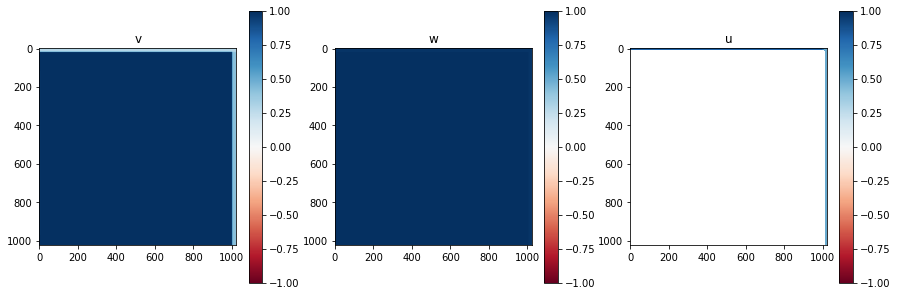

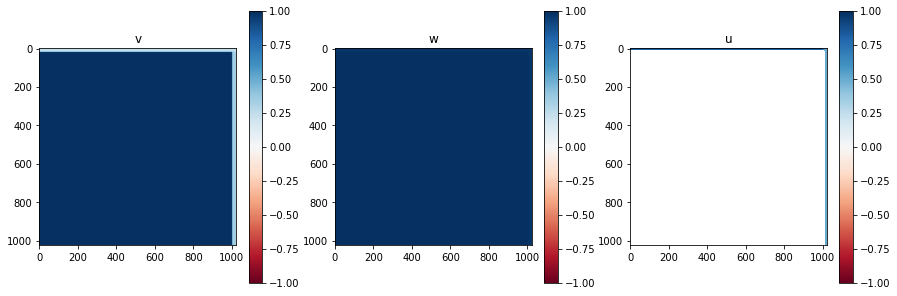

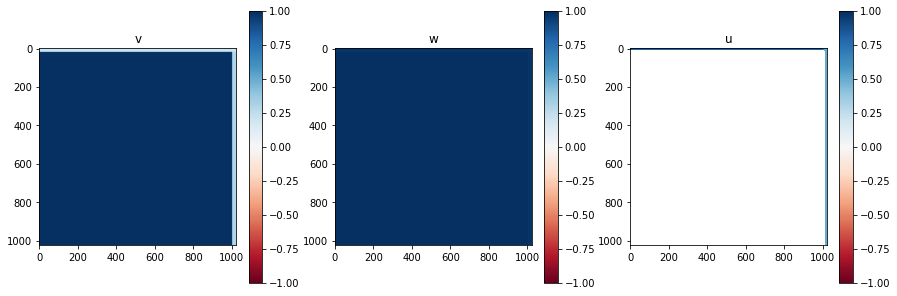

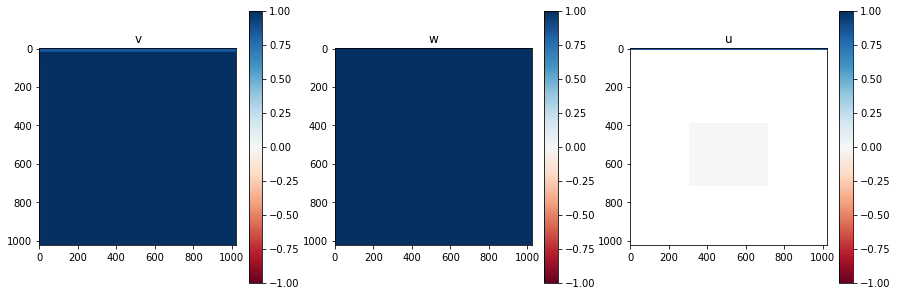

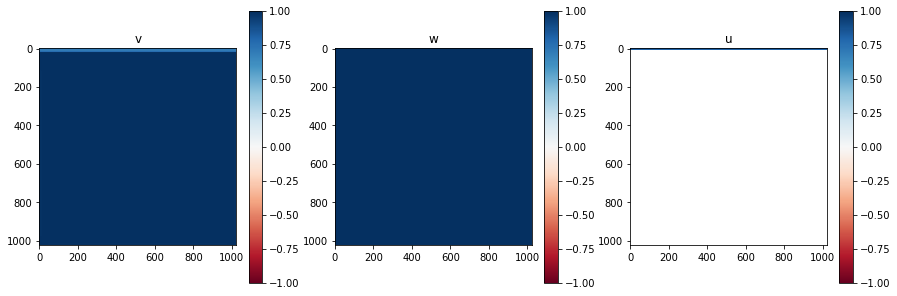

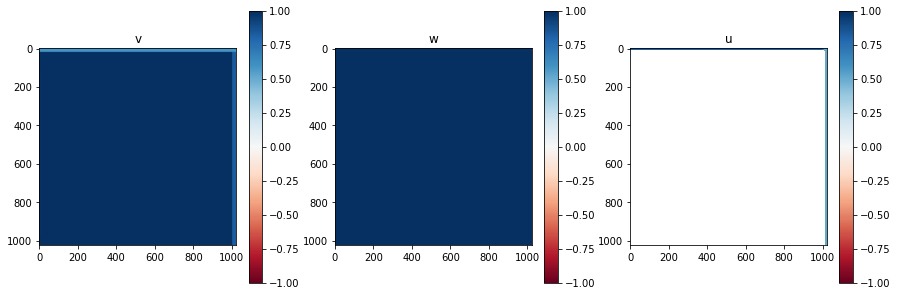

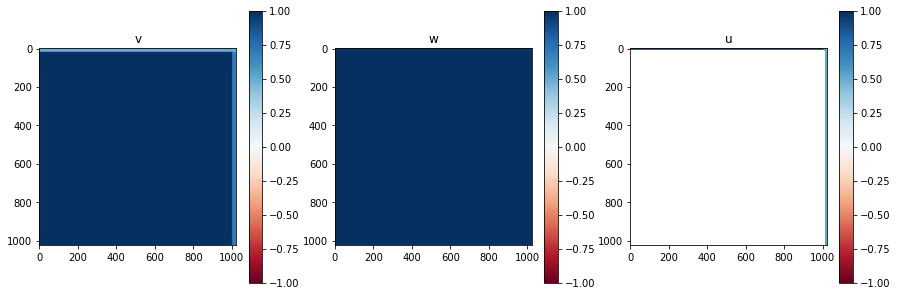

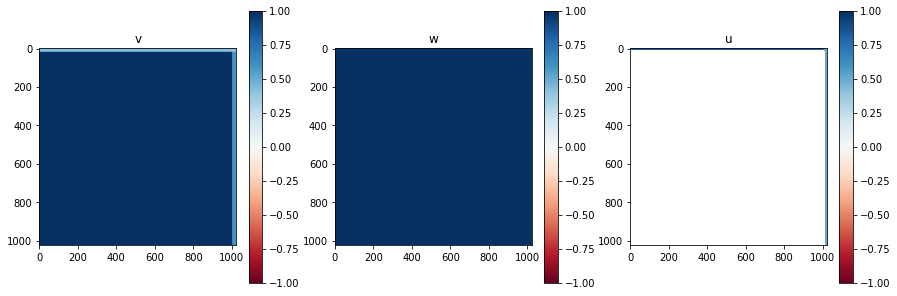

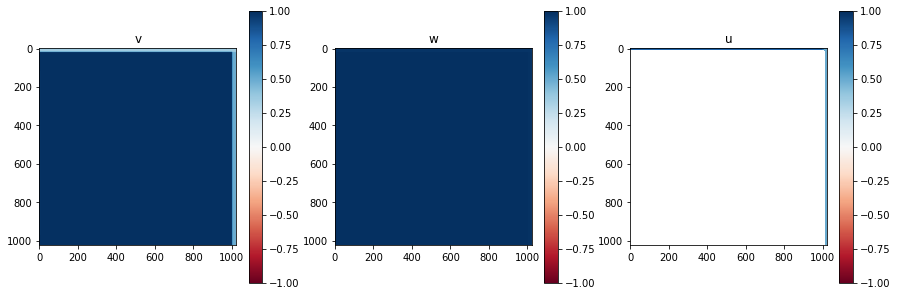

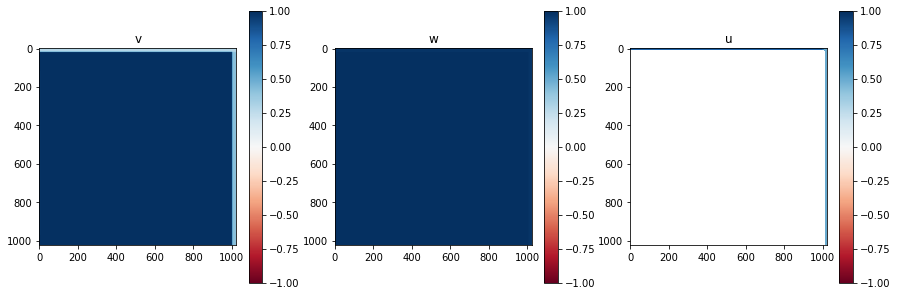

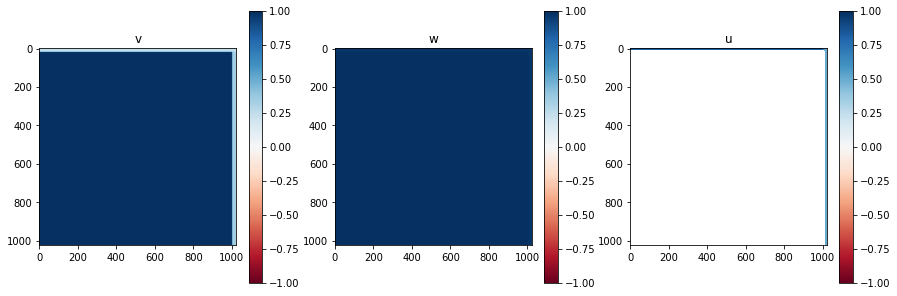

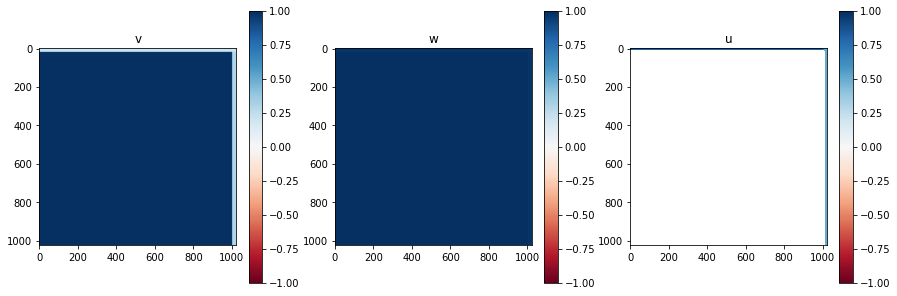

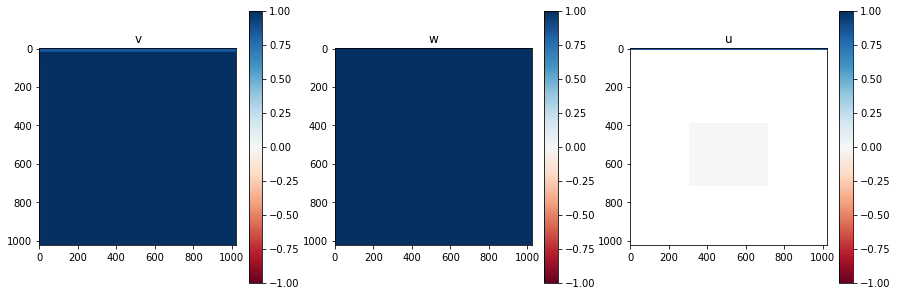

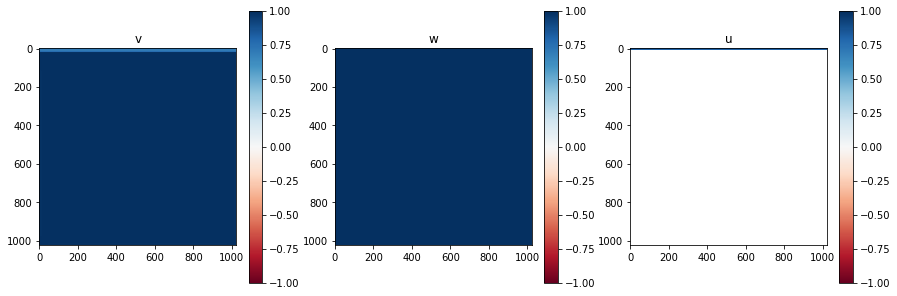

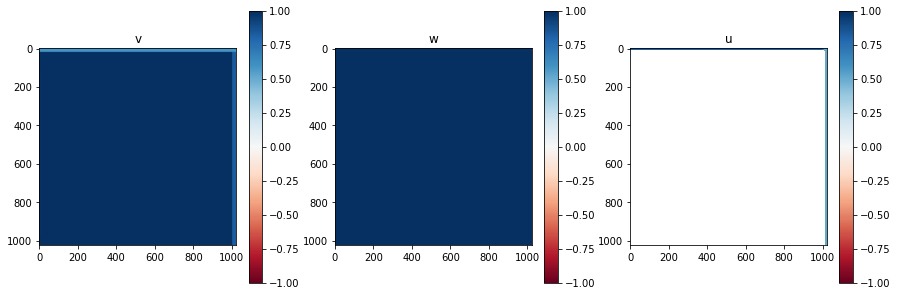

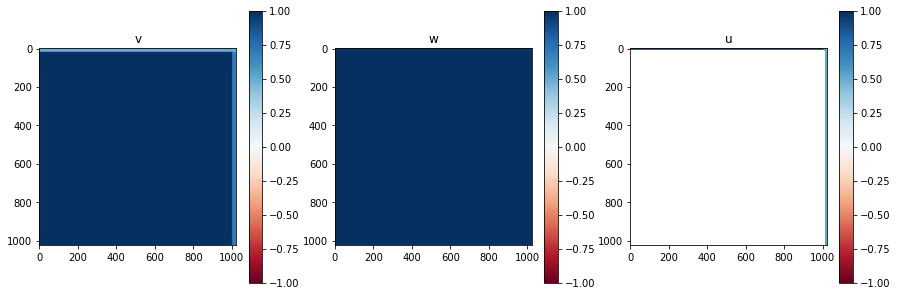

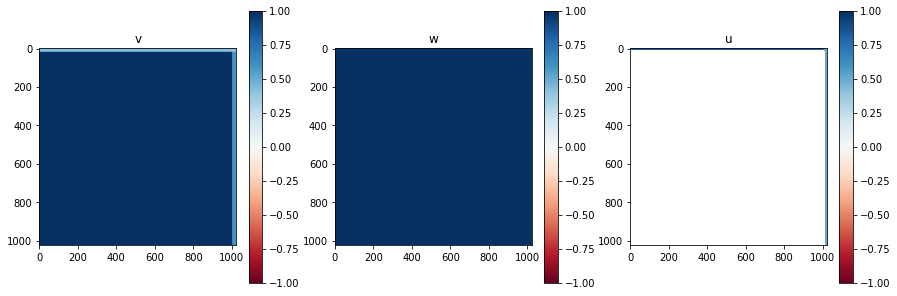

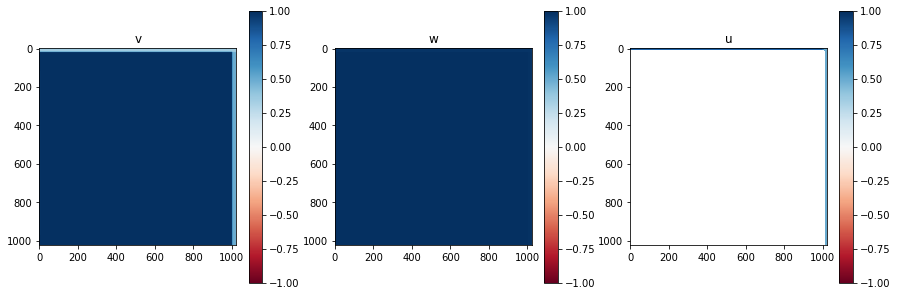

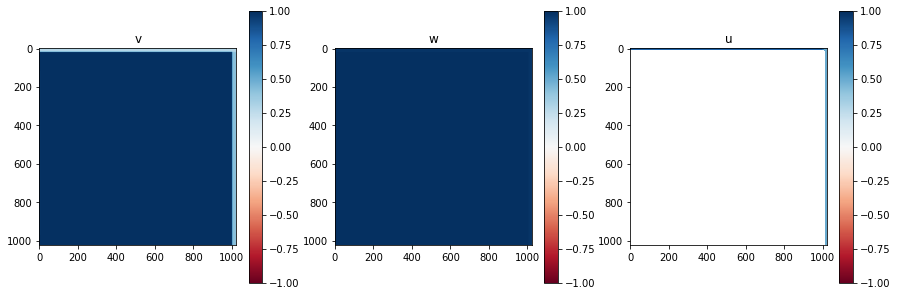

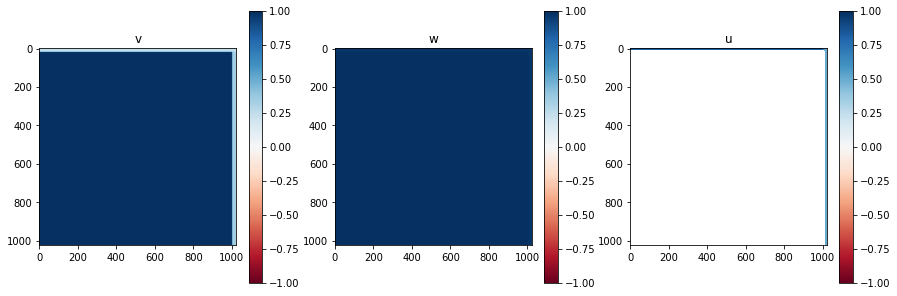

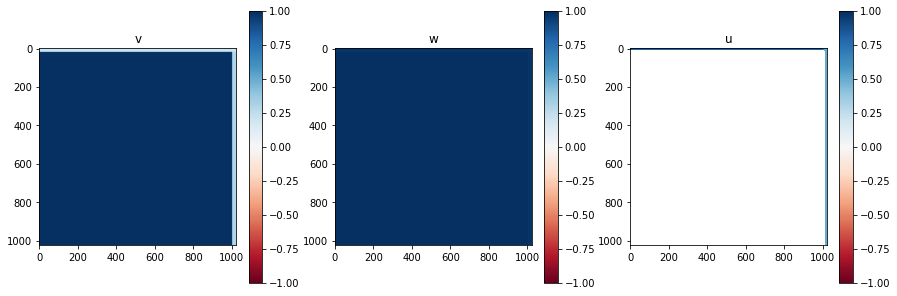

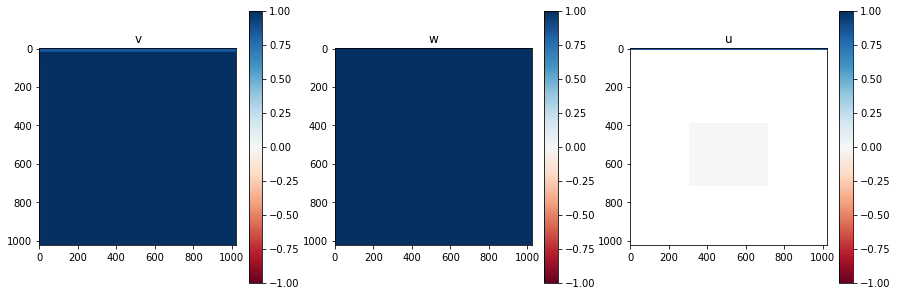

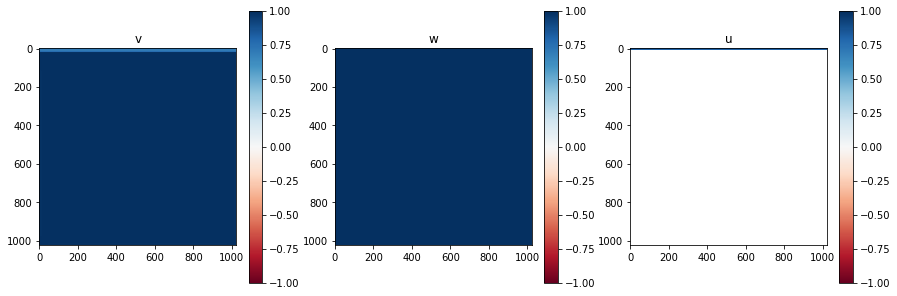

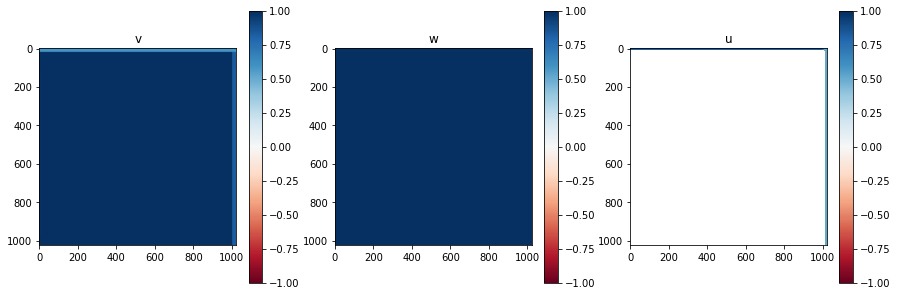

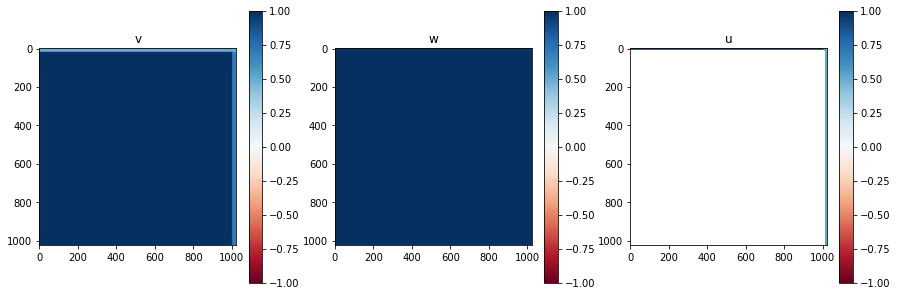

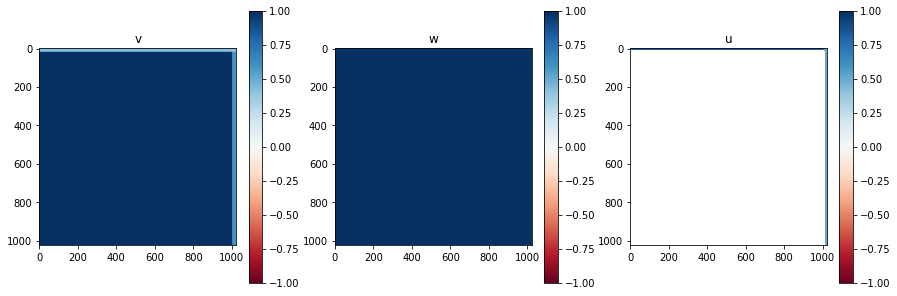

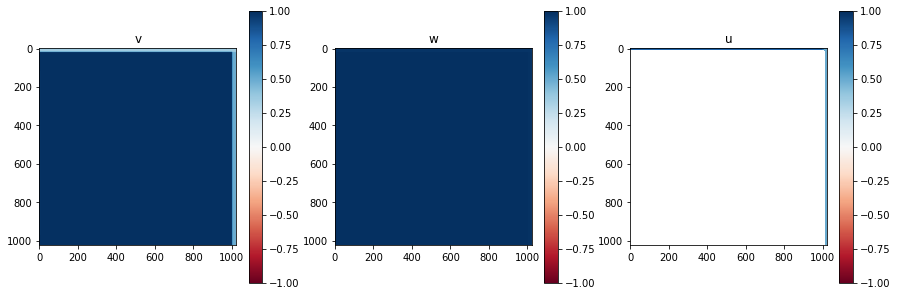

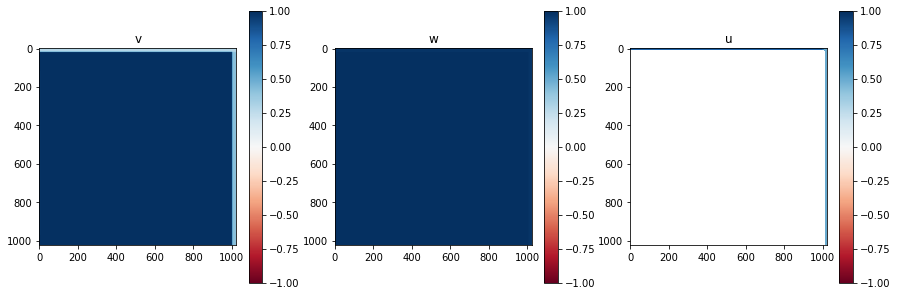

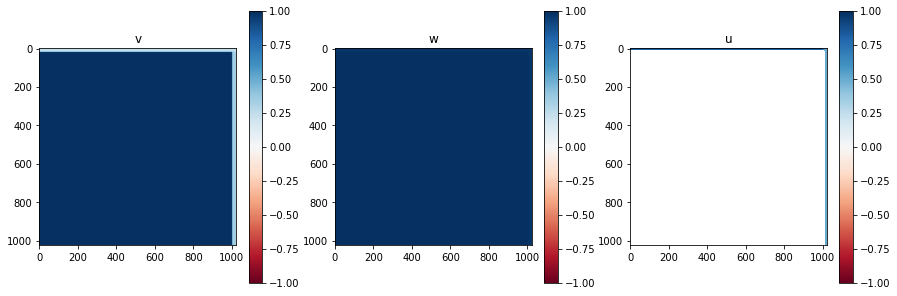

KeyboardInterrupt: 

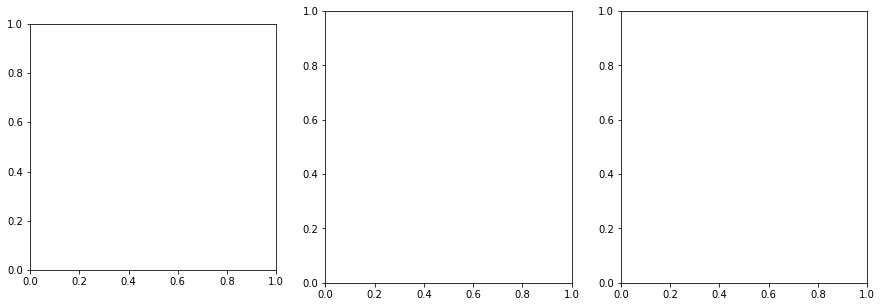

In [23]:
%%timeit -n1
state = model.forward(shape, np.arange(0,1000,100), params.params_test(), D, [s1, s2], dt, dx)[0].block_until_ready()

In [28]:
%%timeit -n10
state = model.init(shape)
p = params.params_test()
for t in range(1000):
    state = model.step(state, t * dt, p, D, [s1, s2], dt)
state[0].block_until_ready()

10 loops, best of 3: 1.86 s per loop


In [46]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 